<a href="https://colab.research.google.com/github/SunKnight-AFan/Youtube_yoloStudy/blob/main/Pineapple_cake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Dec 31 07:10:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 25.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="A6i8I7qWiJcbE2Mcn1iX")
project = rf.workspace("sunknight").project("pineapple_cake_detect")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pineapple_cake_detect-1 in yolov8:: 100%|██████████| 122/122 [00:00<00:00, 7778.33it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 338MB/s]
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Pineapple_cake_detect-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

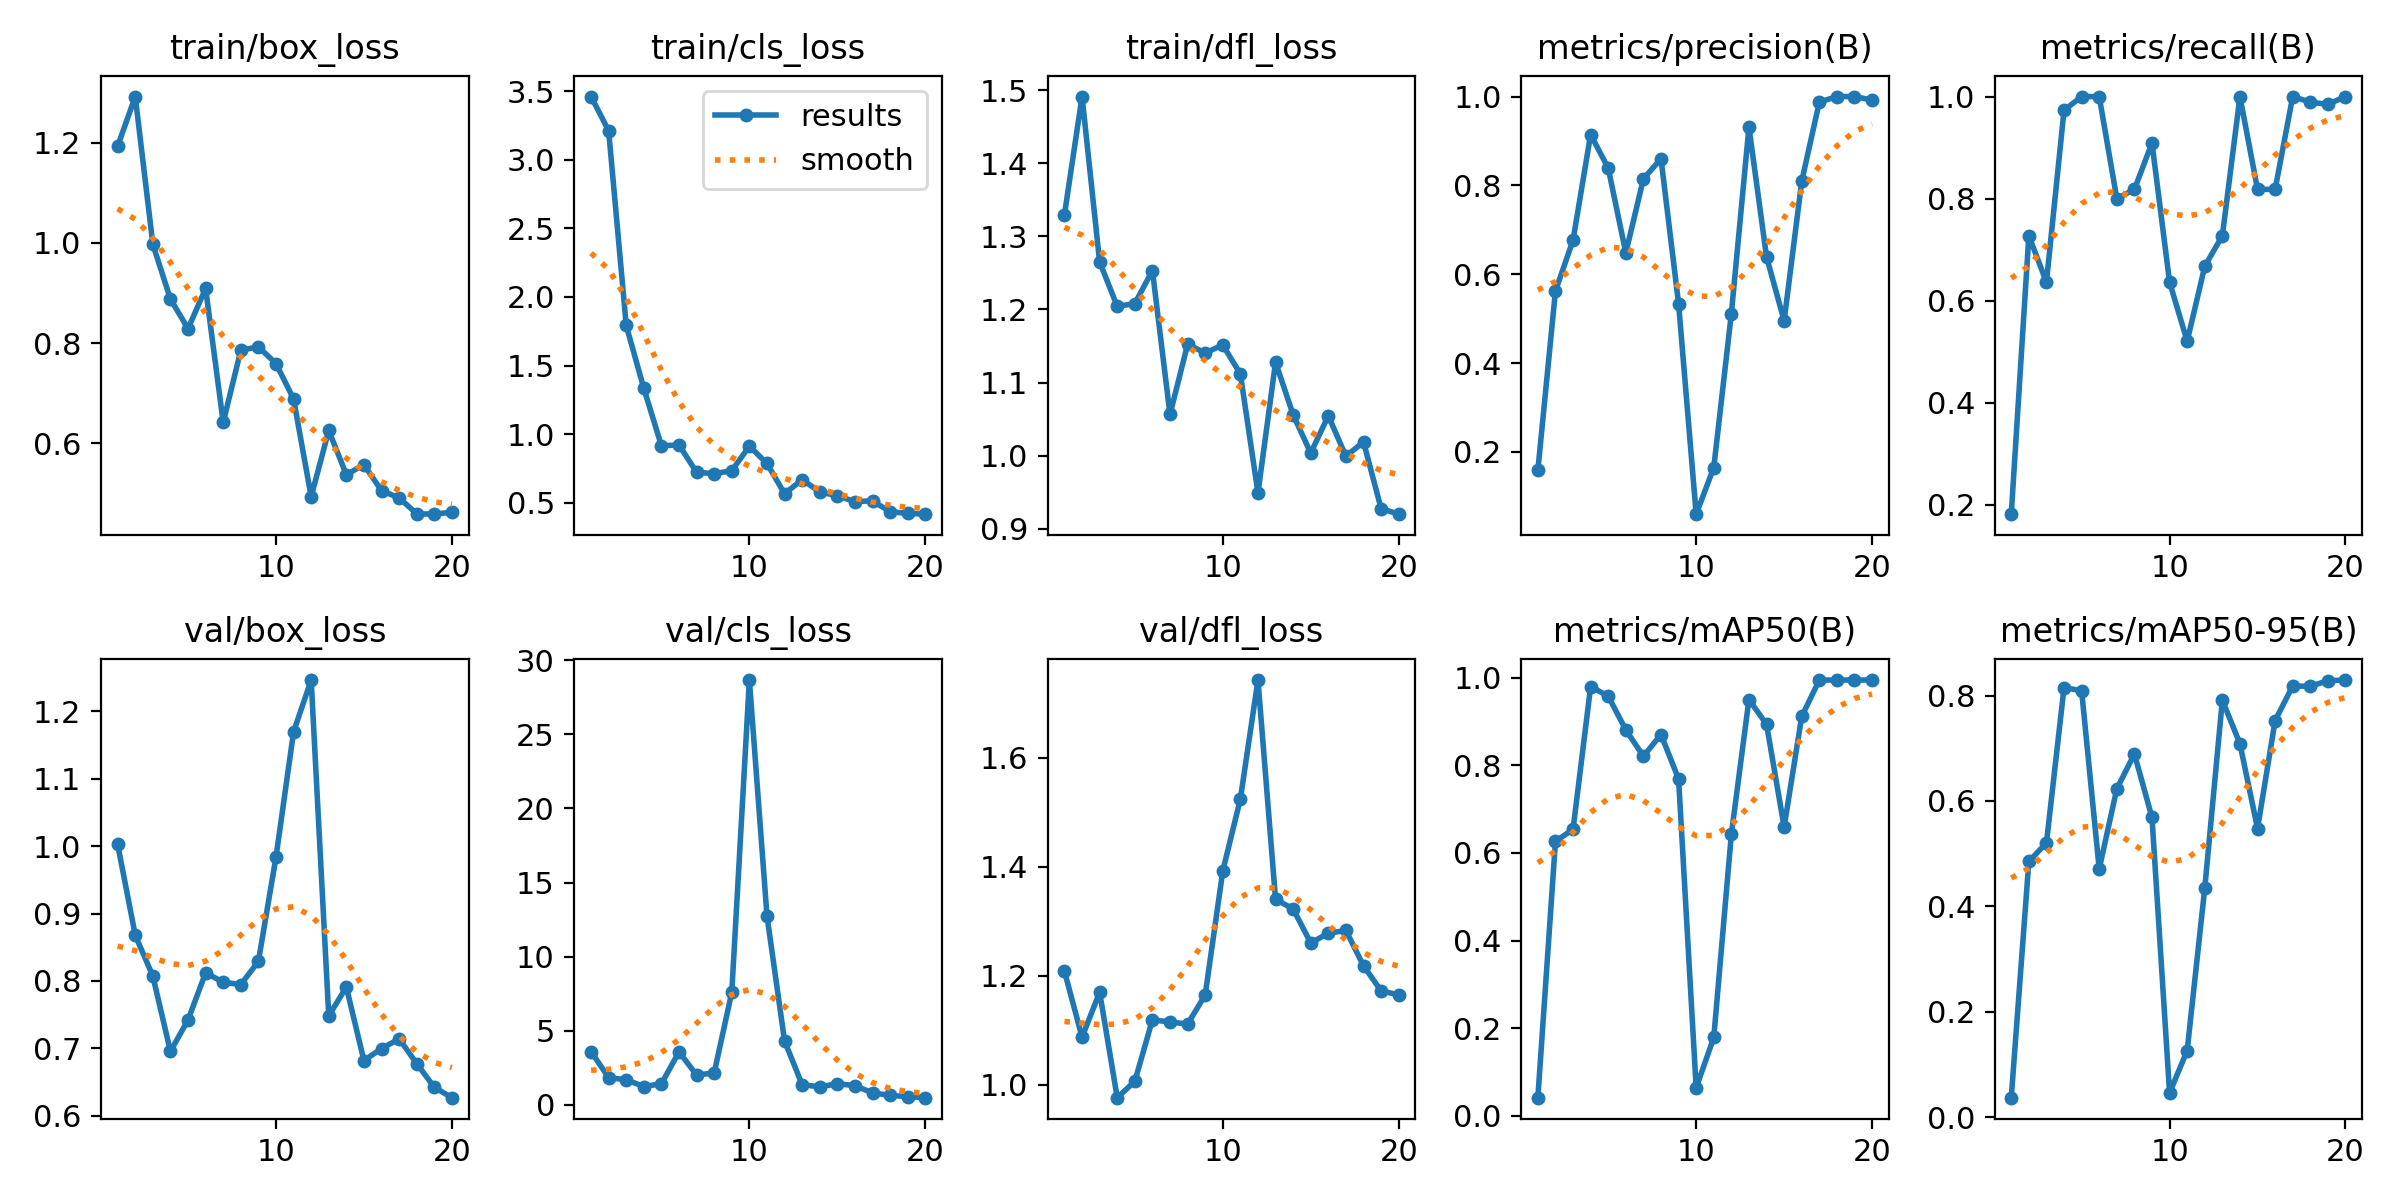

In [ ]:
Image(filename=f'{os.getcwd()}/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model={os.getcwd()}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Pineapple_cake_detect-1/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.16s/it]
                   all         11         11      0.992          1      0.995      0.829
Speed: 0.2ms preprocess, 28.7ms inference, 0.0ms loss, 60.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model={os.getcwd()}/runs/detect/train/weights/best.pt source={dataset.location}/test/images save_crop=True

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/5 /content/Pineapple_cake_detect-1/test/images/13_jpg.rf.542b0145472cb7916796af303adec45c.jpg: 640x640 12 pineapples, 37.0ms
image 2/5 /content/Pineapple_cake_detect-1/test/images/28_jpg.rf.873966fe5e5d196eb183bd45e0ec2ef5.jpg: 640x640 11 pineapples, 37.0ms
image 3/5 /content/Pineapple_cake_detect-1/test/images/32_jpg.rf.fb3d9837ff1576c61eb59e2242e2a10c.jpg: 640x640 3 pineapples, 36.9ms
image 4/5 /content/Pineapple_cake_detect-1/test/images/33_jpg.rf.ba4c06407c574f0f51ab24fe65bc9003.jpg: 640x640 1 pineapple, 36.9ms
image 5/5 /content/Pineapple_cake_detect-1/test/images/48_jpg.rf.7ef78ed8710887ff444d282eb1ee730a.jpg: 640x640 11 pineapples, 36.9ms
Speed: 1.8ms preprocess, 36.9ms inference, 121.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultraly

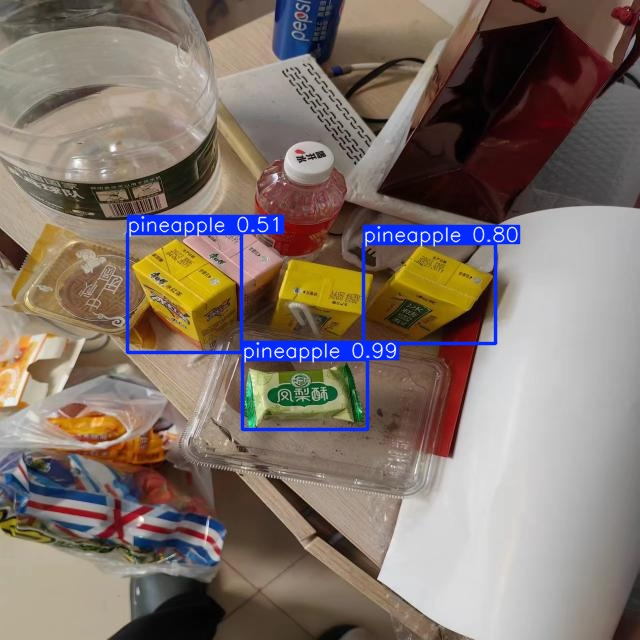

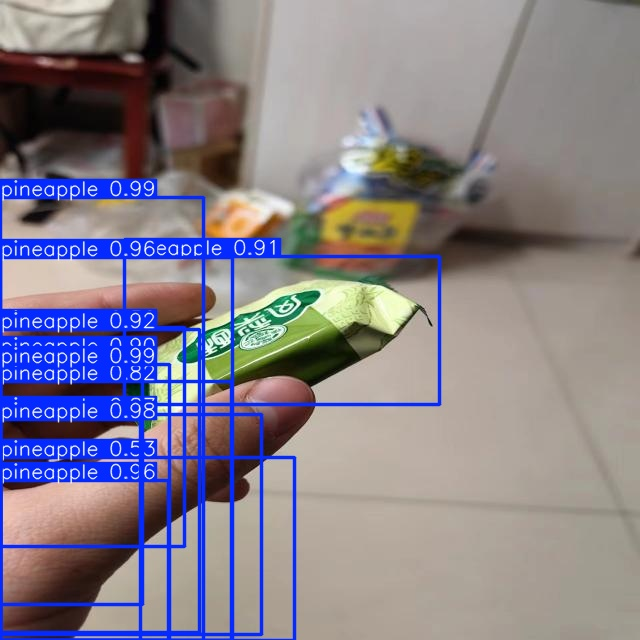

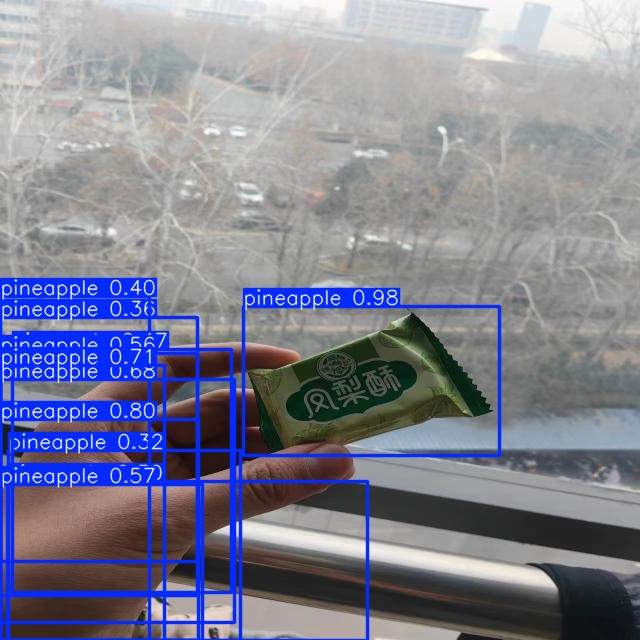

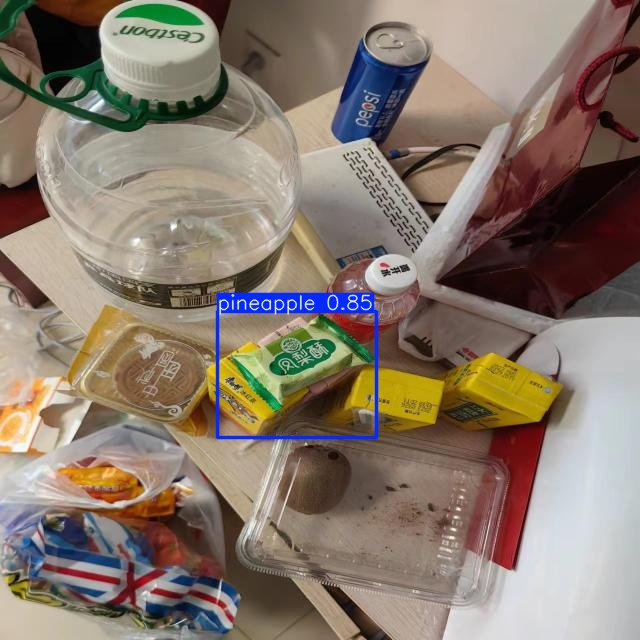

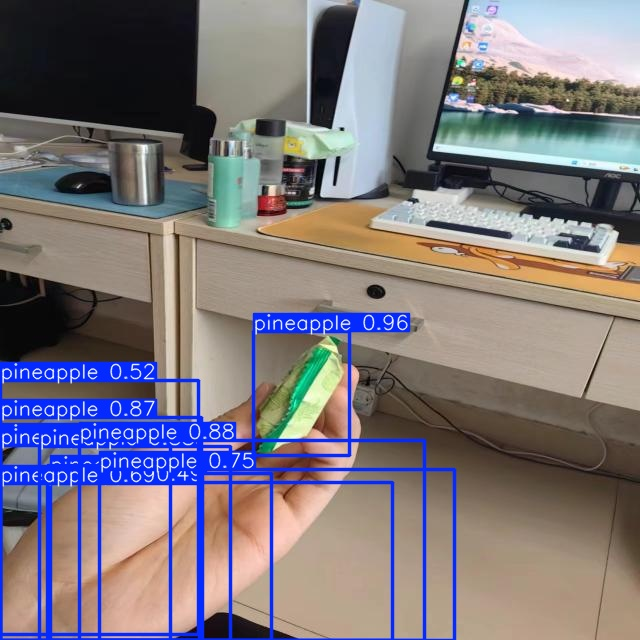

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{os.getcwd()}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))

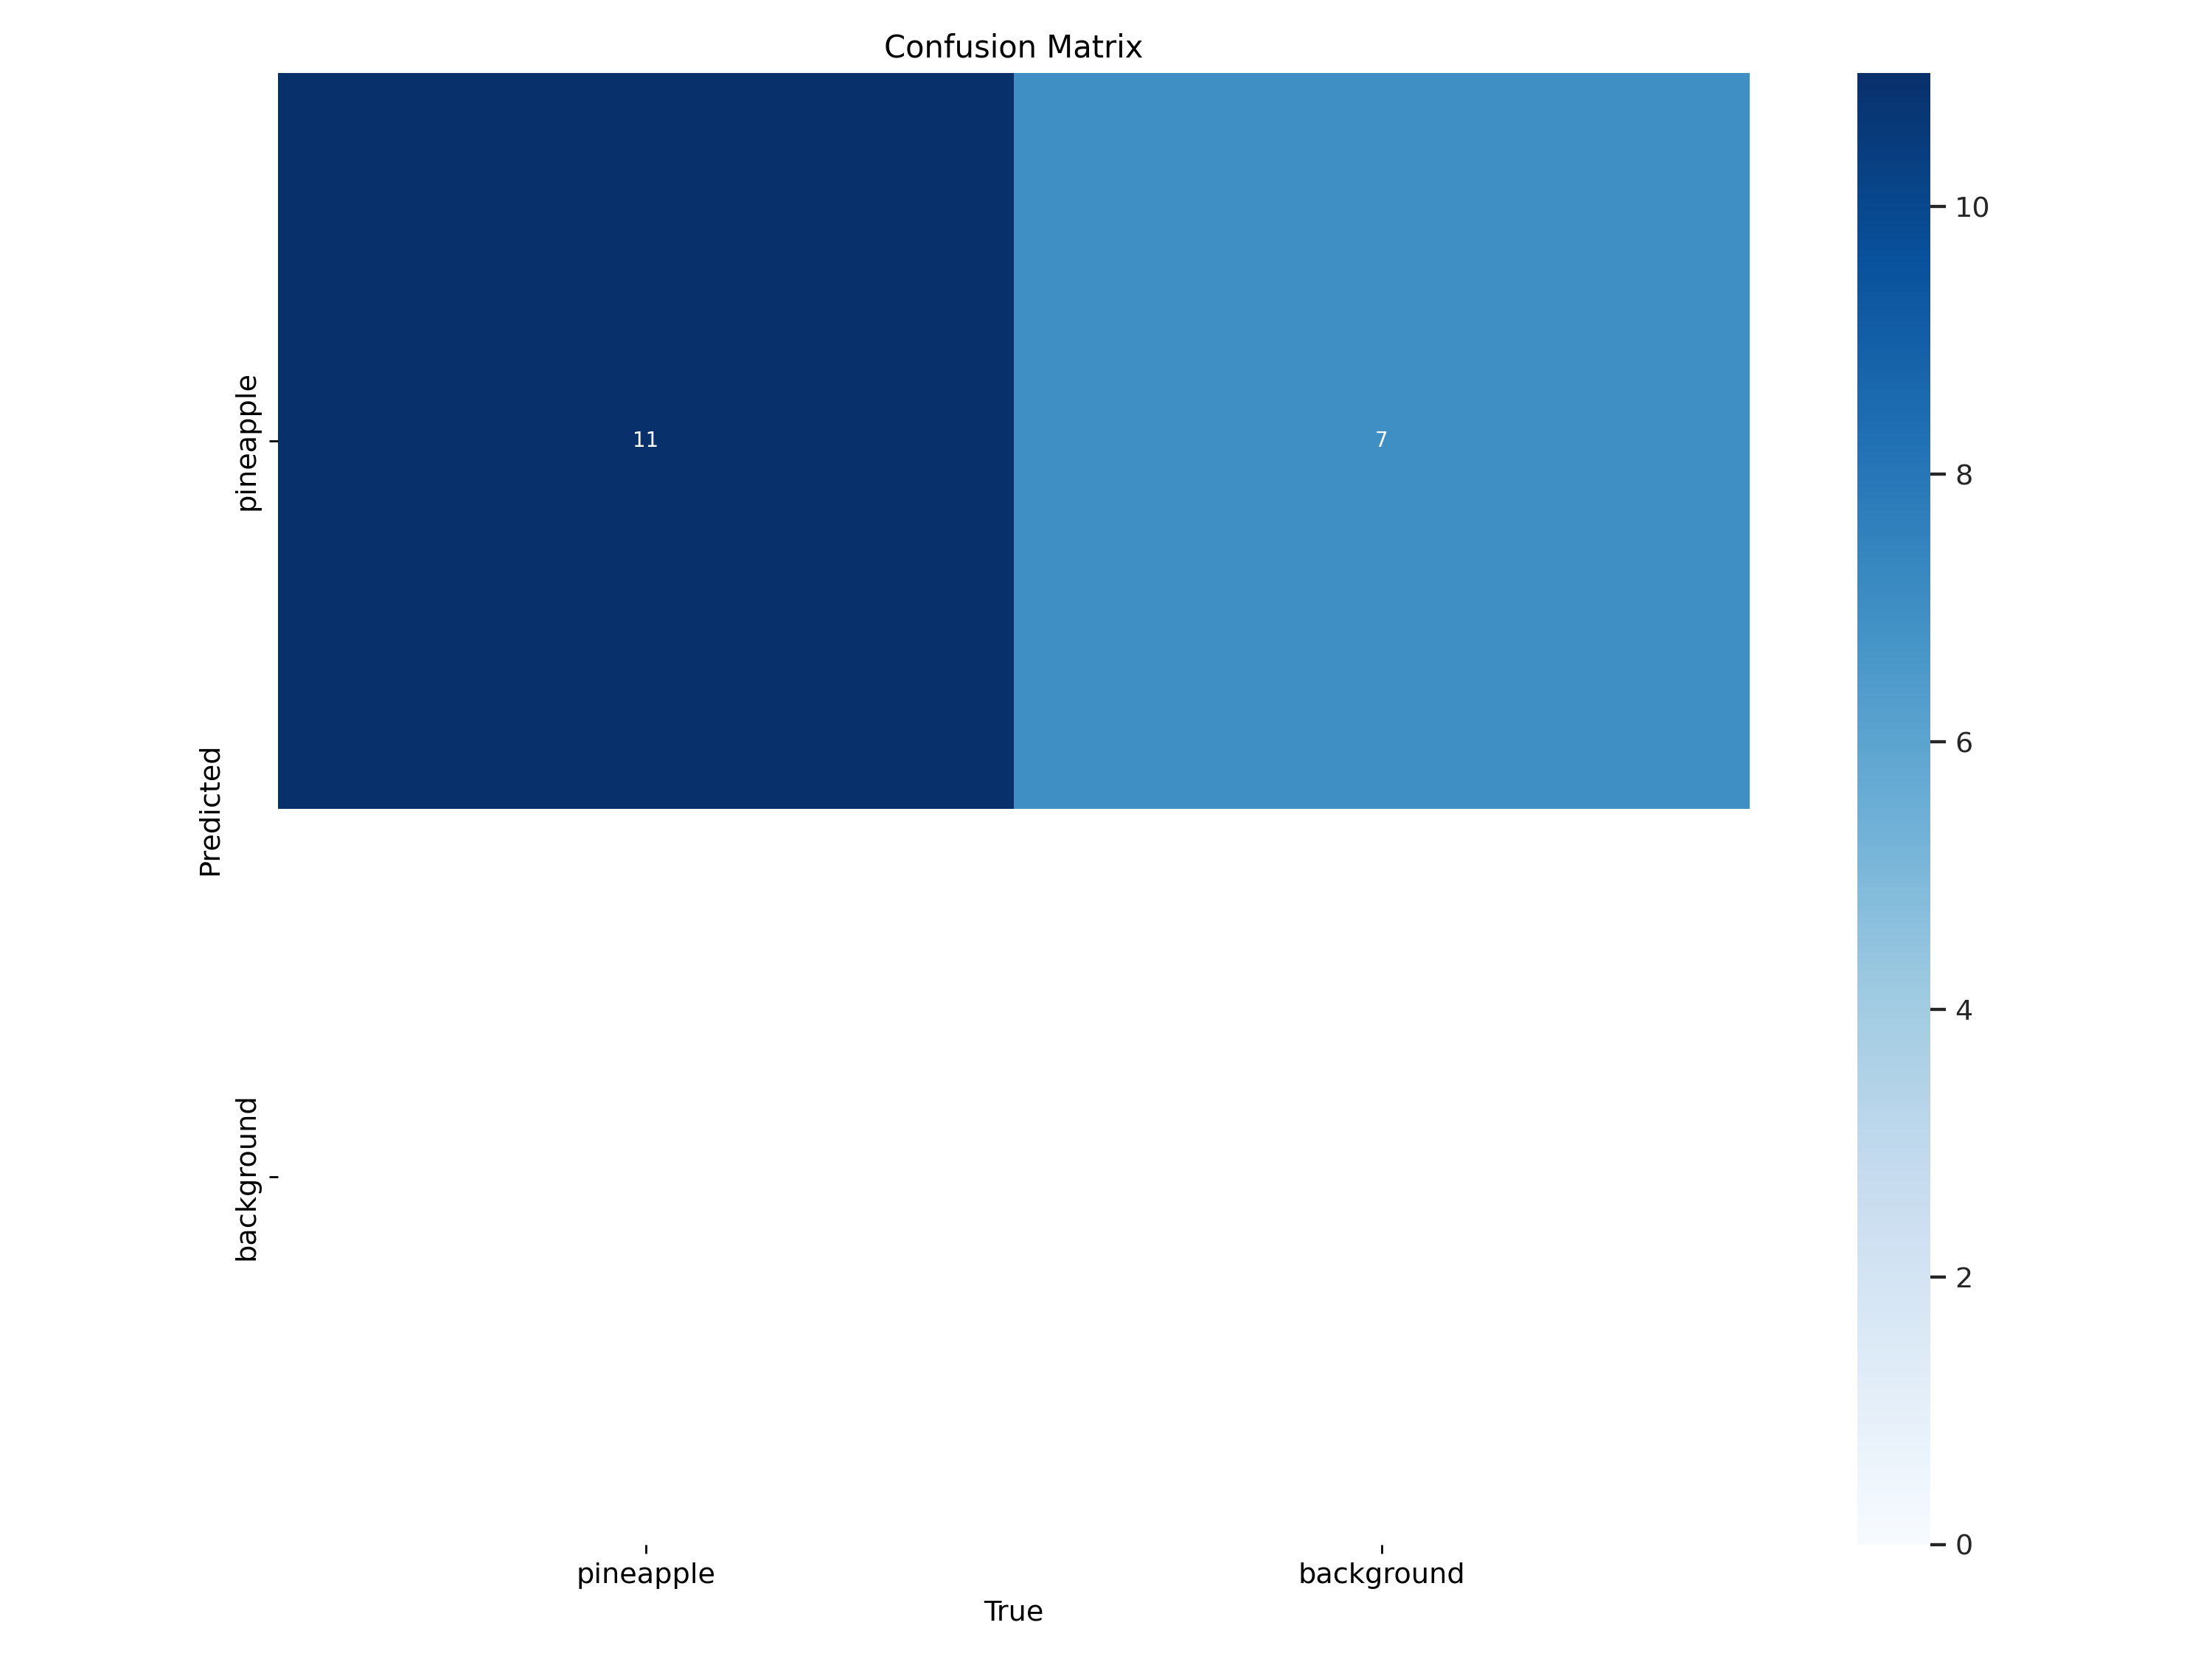

In [ ]:
Image(filename=f'{os.getcwd()}/runs/detect/train/confusion_matrix.png', width=600)

In [13]:
print("Done!")

Done!
